# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# !pip install autoviz
# from autoviz.AutoViz_Class import AutoViz_Class

# Loading Data
* Read Data File from the file path `/kaggle/input/2024-epa-vehicle-fuel-economy/all_alpha_24.xlsx`
* Print columns of the DataFrame
* Print shape of the DataFrame

In [2]:
df = pd.read_excel("/kaggle/input/2024-epa-vehicle-fuel-economy/all_alpha_24.xlsx")
df

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,RHNXV01.54EC,large car,7,30,37,33,6,No,269
1,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,RHNXV01.54EC,large car,7,30,37,33,6,No,269
2,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,RHNXV02.0TDC,large car,6,21,28,24,5,No,371
3,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,FA,T3B50,Federal Tier 3 Bin 50,RHNXV02.0TDC,large car,6,21,28,24,5,No,371
4,ACURA Integra A-Spec,1.5,4.0,Man-6,2WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,RHNXV01.55DC,large car,6,26,36,30,6,No,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,VOLVO XC90 B5,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,RVVXJ02.0U70,standard SUV,5,22,27,24,5,No,369
1709,VOLVO XC90 B6,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,RVVXJ02.0S30,standard SUV,7,20,26,23,5,No,393
1710,VOLVO XC90 B6,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,RVVXJ02.0S30,standard SUV,7,20,26,23,5,No,393
1711,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,RVVXJ02.0P30,standard SUV,7,26/59,27/57,27/58,9,Yes,137


In [3]:
print("Columns: \n", df.columns)
print("\nShape: \n", df.shape)

Columns: 
 Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

Shape: 
 (1713, 18)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1713 non-null   object 
 1   Displ                 1461 non-null   float64
 2   Cyl                   1461 non-null   float64
 3   Trans                 1713 non-null   object 
 4   Drive                 1713 non-null   object 
 5   Fuel                  1713 non-null   object 
 6   Cert Region           1713 non-null   object 
 7   Stnd                  1713 non-null   object 
 8   Stnd Description      1713 non-null   object 
 9   Underhood ID          1713 non-null   object 
 10  Veh Class             1713 non-null   object 
 11  Air Pollution Score   1713 non-null   int64  
 12  City MPG              1713 non-null   object 
 13  Hwy MPG               1713 non-null   object 
 14  Cmb MPG               1713 non-null   object 
 15  Greenhouse Gas Score 

In [5]:
df.describe(include = 'all')

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
count,1713,1461.000000,1461.000000,1713,1713,1713,1713,1713,1713,1713,1713,1713.000000,1713,1713,1713,1713.000000,1713,1713
unique,599,NaN,NaN,25,2,6,2,15,15,292,9,NaN,134,114,126,NaN,3,328
top,CHEVROLET Silverado,NaN,NaN,SemiAuto-8,4WD,Gasoline,FA,L3SULEV30,California LEV-III SULEV30,RPRXV03.0C92,small car,NaN,18,24,19,NaN,No,0
freq,36,NaN,NaN,479,1048,1363,857,307,307,56,459,NaN,122,124,118,NaN,1395,252
mean,NaN,3.033265,5.507187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.201401,NaN,NaN,NaN,5.497373,NaN,NaN
std,NaN,1.251001,1.836311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.157837,NaN,NaN,NaN,2.319190,NaN,NaN
min,NaN,1.200000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN,NaN
50%,NaN,3.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,NaN,NaN
75%,NaN,3.600000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,6.000000,NaN,NaN


# Exploratory Data Analysis (EDA)
* EDA includes data filtration, and cleaning of the data
* Removing unwanted columns
* Removing duplicate entries

## Removing Unwanted Columns
* Droping out unwanted columns `Stnd`, `Stnd Description`, `Underhood ID`.

In [6]:
print("Unique Stnd values: ",df['Stnd'].nunique())
print("Unique Stnd Description values: ",df['Stnd Description'].nunique())
print("Unique Underhood ID values: ",df['Underhood ID'].nunique())

Unique Stnd values:  15
Unique Stnd Description values:  15
Unique Underhood ID values:  292


In [7]:
df.drop(columns=['Stnd', 'Stnd Description', 'Underhood ID', 'Cert Region'], inplace=True)
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,large car,7,30,37,33,6,No,269
1,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,large car,7,30,37,33,6,No,269
2,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,large car,6,21,28,24,5,No,371
3,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,large car,6,21,28,24,5,No,371
4,ACURA Integra A-Spec,1.5,4.0,Man-6,2WD,Gasoline,large car,6,26,36,30,6,No,293


## Removing Duplicate Entries

In [8]:
print("Number of Old Records: ", df.shape)
df.drop_duplicates(inplace=True, ignore_index=True)
print("Number of New Records: ", df.shape)

Number of Old Records:  (1713, 14)
Number of New Records:  (853, 14)


## Correcting City MPG, Hwy MPG, Cmb MPG and Comb CO2 values

`https://www.fueleconomy.gov/feg/atv-hev.shtml`

`https://ascelibrary.org/doi/pdf/10.1061/9780784483138.008?download=true`

In [9]:
df['City MPG'] = [max([int(x[0]), int(x[-1])]) for x in df['City MPG'].str.split('/')]
df['Hwy MPG'] = [max([int(x[0]), int(x[-1])]) for x in df['Hwy MPG'].str.split('/')]
df['Cmb MPG'] = [max([int(x[0]), int(x[-1])]) for x in df['Cmb MPG'].str.split('/')]
df['Comb CO2'] = [max([int(x[0]), int(x[-1])]) for x in df['Comb CO2'].str.split('/')]
df

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,large car,7,30,37,33,6,No,269
1,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,large car,6,21,28,24,5,No,371
2,ACURA Integra A-Spec,1.5,4.0,Man-6,2WD,Gasoline,large car,6,26,36,30,6,No,293
3,ACURA Integra A-Spec,1.5,4.0,SCV-7,2WD,Gasoline,large car,7,29,36,32,6,No,277
4,ACURA MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,small SUV,5,19,26,22,5,No,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,VOLVO XC60 B5,2.0,4.0,SemiAuto-8,4WD,Gasoline,small SUV,5,22,28,25,5,No,363
849,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,small SUV,7,66,60,63,9,Yes,122
850,VOLVO XC90 B5,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,5,22,27,24,5,No,369
851,VOLVO XC90 B6,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,7,20,26,23,5,No,393


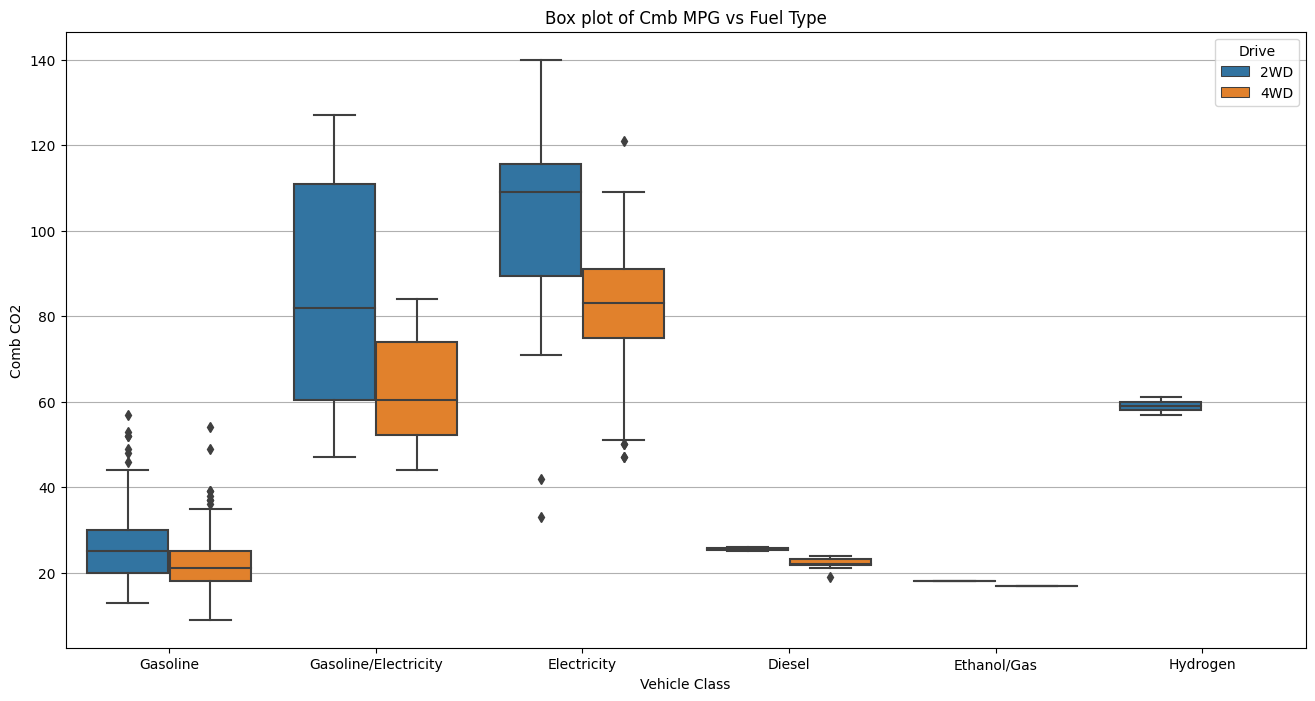

In [10]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(ax=ax, data=df, x='Fuel', y='Cmb MPG', hue='Drive')
ax.set_title('Box plot of Cmb MPG vs Fuel Type')
ax.set_xlabel('Vehicle Class')
ax.set_ylabel('Comb CO2')
ax.grid(axis='y')
ax.set_axisbelow(True);

## Separating Combustion Engine vs Electric Engine

In [11]:
e_df = df.copy()
e_df = e_df[e_df.isnull().any(axis=1)].reset_index(inplace=False)
e_df.drop(columns=['index', 'Displ', 'Cyl', 'Air Pollution Score', 'Greenhouse Gas Score', 'Comb CO2'], inplace=True)
e_df

,Model,Trans,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG,SmartWay
0,AUDI Q4 40 e-tron,Auto-1,2WD,Electricity,standard SUV,30,36,33,Elite
1,AUDI Q4 50 e-tron quattro,Auto-1,4WD,Electricity,standard SUV,97,87,93,Elite
2,AUDI Q4 Sportback 50 e-tron quattro,Auto-1,4WD,Electricity,standard SUV,100,89,95,Elite
3,AUDI Q8 Sportback e-tron quattro,Auto-2,4WD,Electricity,standard SUV,84,90,87,Elite
4,AUDI Q8 Sportback e-tron ultra quattro,Auto-2,4WD,Electricity,standard SUV,84,89,86,Elite
...,...,...,...,...,...,...,...,...,...
121,VINFAST VF 9 Plus,Auto-1,4WD,Electricity,special purpose,71,66,69,Elite
122,VOLVO C40 Recharge,Auto-1,2WD,Electricity,small SUV,118,96,107,Elite
123,VOLVO C40 Recharge twin,Auto-1,4WD,Electricity,small SUV,106,91,99,Elite
124,VOLVO XC40 Recharge,Auto-1,2WD,Electricity,small SUV,118,95,106,Elite


In [12]:
c_df = df.copy()
c_df.dropna(inplace=True)
c_df

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,large car,7,30,37,33,6,No,269
1,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,large car,6,21,28,24,5,No,371
2,ACURA Integra A-Spec,1.5,4.0,Man-6,2WD,Gasoline,large car,6,26,36,30,6,No,293
3,ACURA Integra A-Spec,1.5,4.0,SCV-7,2WD,Gasoline,large car,7,29,36,32,6,No,277
4,ACURA MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,small SUV,5,19,26,22,5,No,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,VOLVO XC60 B5,2.0,4.0,SemiAuto-8,4WD,Gasoline,small SUV,5,22,28,25,5,No,363
849,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,small SUV,7,66,60,63,9,Yes,122
850,VOLVO XC90 B5,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,5,22,27,24,5,No,369
851,VOLVO XC90 B6,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,7,20,26,23,5,No,393


## Columns Tranformation
* Transfomring columns and its value

### Model
* Spliting `Model` column into two seperate columns namely `Company` and `Model`.

In [13]:
company_name = e_df['Model'].str.split().str[0]
model_name = [" ".join(x) for x in e_df['Model'].str.split().str[1:]]

e_df.drop(columns=['Model'], inplace=True)

e_df.insert(0, 'Company', company_name)
e_df.insert(1, 'Model', model_name)
e_df.head()

,Company,Model,Trans,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG,SmartWay
0,AUDI,Q4 40 e-tron,Auto-1,2WD,Electricity,standard SUV,30,36,33,Elite
1,AUDI,Q4 50 e-tron quattro,Auto-1,4WD,Electricity,standard SUV,97,87,93,Elite
2,AUDI,Q4 Sportback 50 e-tron quattro,Auto-1,4WD,Electricity,standard SUV,100,89,95,Elite
3,AUDI,Q8 Sportback e-tron quattro,Auto-2,4WD,Electricity,standard SUV,84,90,87,Elite
4,AUDI,Q8 Sportback e-tron ultra quattro,Auto-2,4WD,Electricity,standard SUV,84,89,86,Elite


In [14]:
company_name = c_df['Model'].str.split().str[0]
model_name = [" ".join(x) for x in c_df['Model'].str.split().str[1:]]

c_df.drop(columns=['Model'], inplace=True)

c_df.insert(0, 'Company', company_name)
c_df.insert(1, 'Model', model_name)
c_df.head()

,Company,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA,Integra,1.5,4.0,SCV-7,2WD,Gasoline,large car,7,30,37,33,6,No,269
1,ACURA,Integra,2.0,4.0,Man-6,2WD,Gasoline,large car,6,21,28,24,5,No,371
2,ACURA,Integra A-Spec,1.5,4.0,Man-6,2WD,Gasoline,large car,6,26,36,30,6,No,293
3,ACURA,Integra A-Spec,1.5,4.0,SCV-7,2WD,Gasoline,large car,7,29,36,32,6,No,277
4,ACURA,MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,small SUV,5,19,26,22,5,No,411


### Number of models per Car Manufacturing company

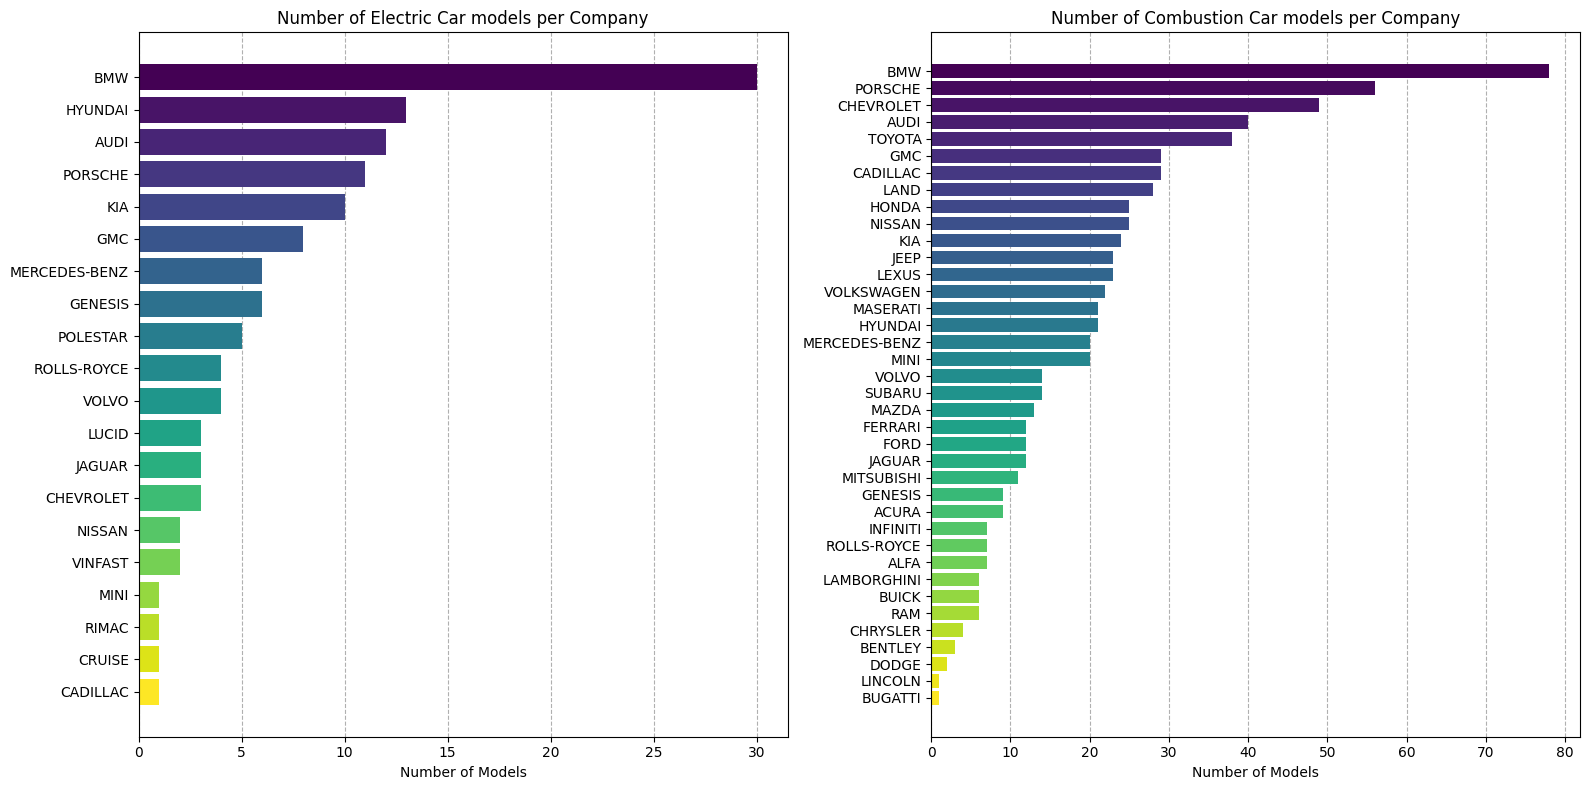

In [15]:
# Assuming 'column_to_group_by' is the column you want to group by
e_grouped_data = e_df.groupby('Company').agg({'Model': 'count'}).sort_values(by='Model', ascending=True).reset_index()

# Assuming 'column_to_group_by' is the column you want to group by
c_grouped_data = c_df.groupby('Company').agg({'Model': 'count'}).sort_values(by='Model', ascending=True).reset_index()

e_colors = plt.cm.viridis(np.linspace(0, 1, len(e_grouped_data)))
c_colors = plt.cm.viridis(np.linspace(0, 1, len(c_grouped_data)))

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot electric car data
ax[0].barh(e_grouped_data['Company'], e_grouped_data['Model'], color=e_colors[::-1])
ax[0].set_title("Number of Electric Car models per Company")
ax[0].set_xlabel("Number of Models")
ax[0].grid(axis='x', linestyle='--')
ax[0].set_axisbelow(True)


# Plot combustion car data
ax[1].barh(c_grouped_data['Company'], c_grouped_data['Model'], color=c_colors[::-1])
ax[1].set_title("Number of Combustion Car models per Company")
ax[1].set_xlabel("Number of Models")
ax[1].grid(axis='x', linestyle='--')
ax[1].set_axisbelow(True)


plt.tight_layout()
plt.show()

### Number of models per Car Manufacturing company

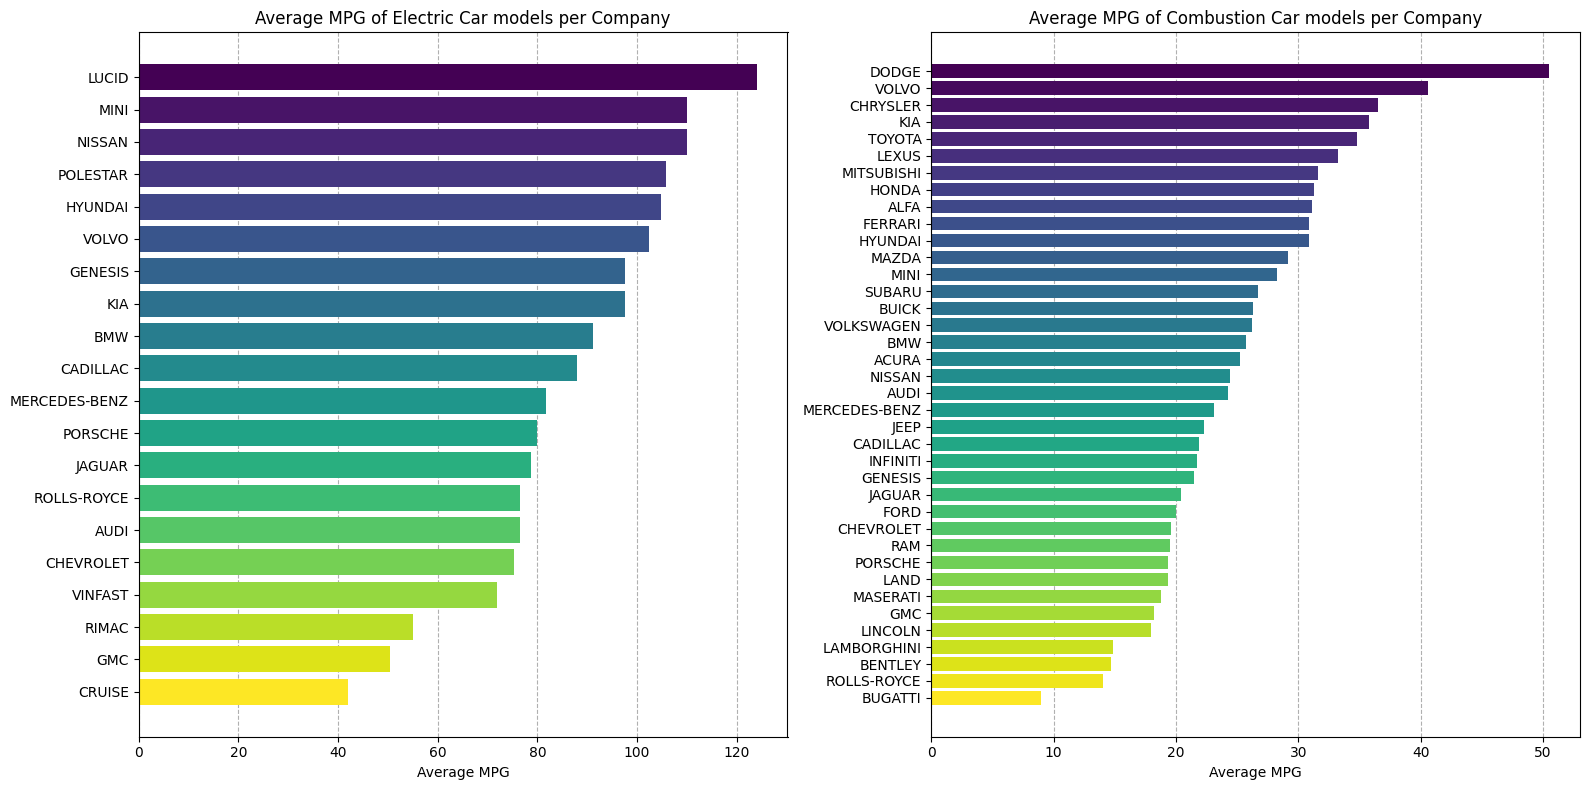

In [16]:
# Assuming 'column_to_group_by' is the column you want to group by
e_grouped_data = e_df[['Company', 'Cmb MPG']].groupby('Company').agg({'Cmb MPG': 'mean'}).sort_values(by='Cmb MPG', ascending=True).reset_index()

# Assuming 'column_to_group_by' is the column you want to group by
c_grouped_data = c_df[['Company', 'Cmb MPG']].groupby('Company').agg({'Cmb MPG': 'mean'}).sort_values(by='Cmb MPG', ascending=True).reset_index()

e_colors = plt.cm.viridis(np.linspace(0, 1, len(e_grouped_data)))
c_colors = plt.cm.viridis(np.linspace(0, 1, len(c_grouped_data)))

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot electric car data
ax[0].barh(y=e_grouped_data['Company'], width=e_grouped_data['Cmb MPG'], color=e_colors[::-1])
ax[0].set_title("Average MPG of Electric Car models per Company")
ax[0].set_xlabel("Average MPG")
ax[0].grid(axis='x', linestyle='--')
ax[0].set_axisbelow(True)

# Plot combustion car data
ax[1].barh(y=c_grouped_data['Company'], width=c_grouped_data['Cmb MPG'], color=c_colors[::-1])
ax[1].set_title("Average MPG of Combustion Car models per Company")
ax[1].set_xlabel("Average MPG")
ax[1].grid(axis='x', linestyle='--')
ax[1].set_axisbelow(True)


plt.tight_layout()
plt.show()

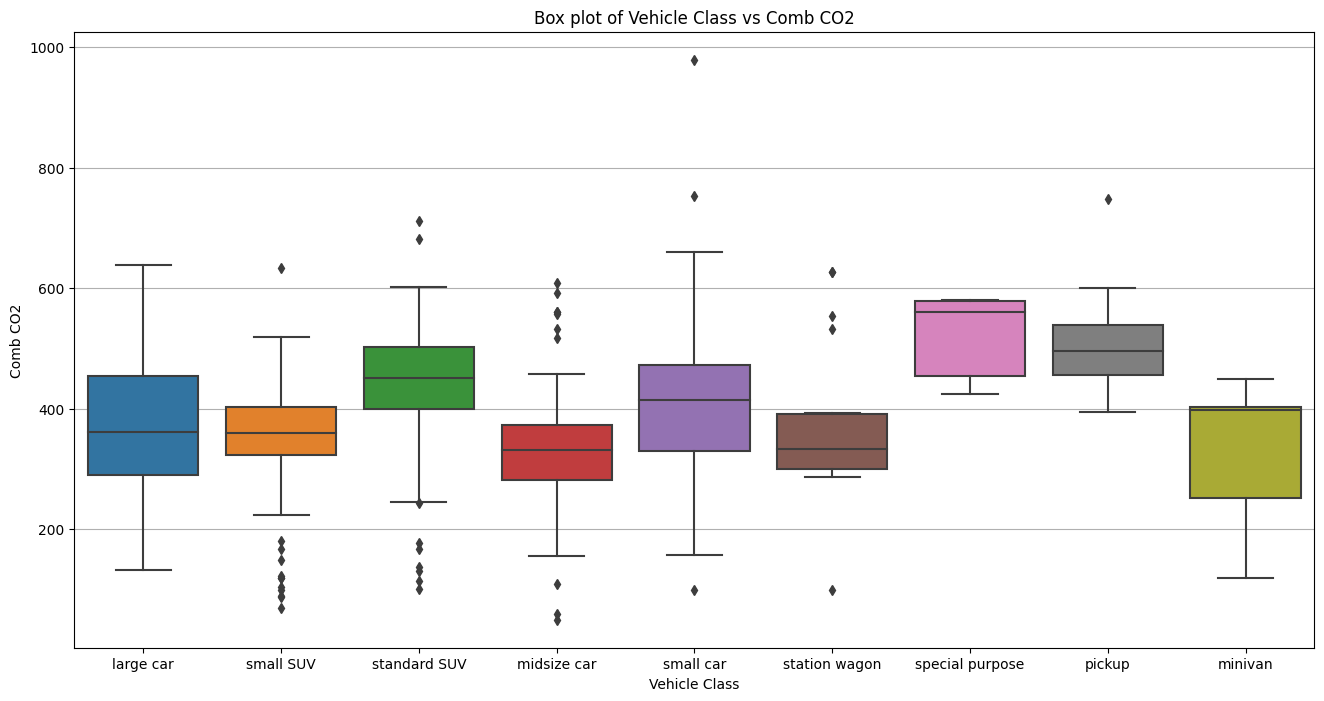

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(ax=ax, data=c_df, x='Veh Class', y='Comb CO2')
ax.set_title('Box plot of Vehicle Class vs Comb CO2')
ax.set_xlabel('Vehicle Class')
ax.set_ylabel('Comb CO2')
ax.grid(axis='y')
ax.set_axisbelow(True);

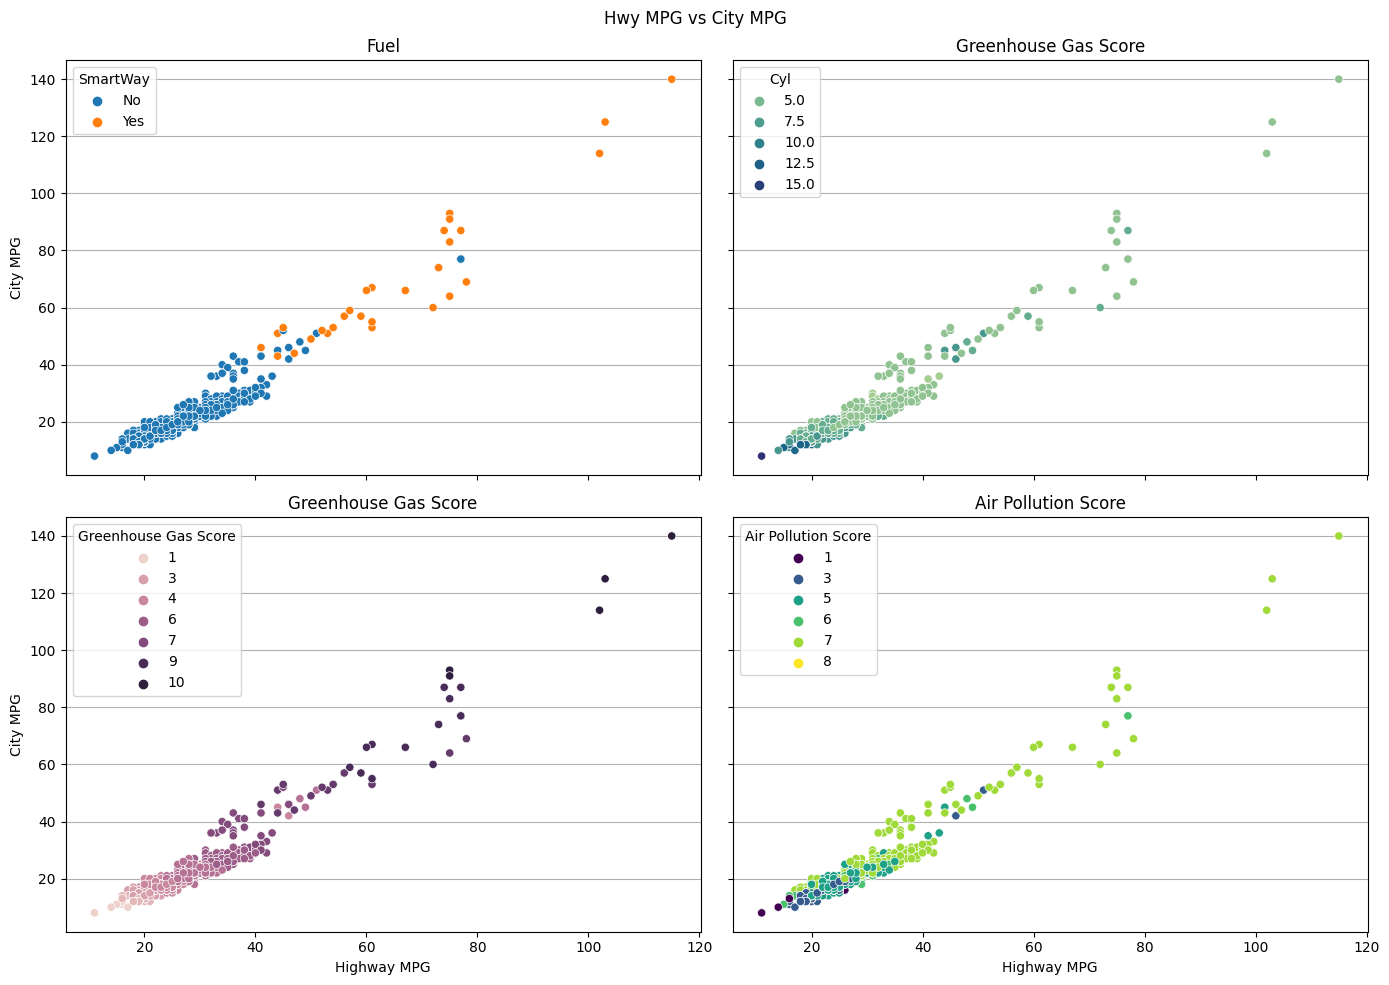

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10), sharex=True, sharey=True)

sns.scatterplot(ax=ax[0,0], data=c_df, x='Hwy MPG', y='City MPG', hue='SmartWay')
plt.suptitle("Hwy MPG vs City MPG")
ax[0,0].set_title('Fuel')
ax[0,0].set_xlabel('Highway MPG')
ax[0,0].set_ylabel('City MPG')
ax[0,0].legend(title='SmartWay')
ax[0,0].grid(axis='y')
ax[0,0].set_axisbelow(True)

sns.scatterplot(ax=ax[0,1], data=c_df, x='Hwy MPG', y='City MPG', hue='Cyl', palette="crest")
ax[0,1].set_title('Greenhouse Gas Score')
ax[0,1].set_xlabel('Highway MPG')
ax[0,1].set_ylabel('City MPG')
ax[0,1].legend(title='Cyl')
ax[0,1].grid(axis='y')
ax[0,1].set_axisbelow(True)

sns.scatterplot(ax=ax[1,0], data=c_df, x='Hwy MPG', y='City MPG', hue='Greenhouse Gas Score')
ax[1,0].set_title('Greenhouse Gas Score')
ax[1,0].set_xlabel('Highway MPG')
ax[1,0].set_ylabel('City MPG')
ax[1,0].legend(title='Greenhouse Gas Score')
ax[1,0].grid(axis='y')
ax[1,0].set_axisbelow(True)

sns.scatterplot(ax=ax[1,1], data=c_df, x='Hwy MPG', y='City MPG', hue='Air Pollution Score', palette="viridis")
ax[1,1].set_title('Air Pollution Score')
ax[1,1].set_xlabel('Highway MPG')
ax[1,1].set_ylabel('City MPG')
ax[1,1].legend(title='Air Pollution Score')
ax[1,1].grid(axis='y')
ax[1,1].set_axisbelow(True)

plt.tight_layout();

In [19]:
# e_df.drop(columns=['Company', 'Model'], inplace=True)
# c_df.drop(columns=['Company', 'Model'], inplace=True)

In [20]:
c_df.columns

Index(['Company', 'Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

## Trans

In [21]:
e_df['gear_num'] = [int(x[1]) for x in e_df['Trans'].str.split('-')]
e_df.drop(columns=['Trans'], inplace=True)
e_df.head()

,Company,Model,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG,SmartWay,gear_num
0,AUDI,Q4 40 e-tron,2WD,Electricity,standard SUV,30,36,33,Elite,1
1,AUDI,Q4 50 e-tron quattro,4WD,Electricity,standard SUV,97,87,93,Elite,1
2,AUDI,Q4 Sportback 50 e-tron quattro,4WD,Electricity,standard SUV,100,89,95,Elite,1
3,AUDI,Q8 Sportback e-tron quattro,4WD,Electricity,standard SUV,84,90,87,Elite,2
4,AUDI,Q8 Sportback e-tron ultra quattro,4WD,Electricity,standard SUV,84,89,86,Elite,2


In [22]:
c_df['Trans'] = c_df['Trans'].replace('CVT', 'CVT-0')

c_df['Trans_type'] = [x[0] for x in c_df['Trans'].str.split('-')]
c_df['Gear_num'] = [int(x[1]) for x in c_df['Trans'].str.split('-')]
c_df.drop(columns=['Trans'], inplace=True)
c_df.head()

,Company,Model,Displ,Cyl,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Trans_type,Gear_num
0,ACURA,Integra,1.5,4.0,2WD,Gasoline,large car,7,30,37,33,6,No,269,SCV,7
1,ACURA,Integra,2.0,4.0,2WD,Gasoline,large car,6,21,28,24,5,No,371,Man,6
2,ACURA,Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,6,26,36,30,6,No,293,Man,6
3,ACURA,Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,7,29,36,32,6,No,277,SCV,7
4,ACURA,MDX,3.5,6.0,2WD,Gasoline,small SUV,5,19,26,22,5,No,411,SemiAuto,10


## SmartWay

`https://www.epa.gov/greenvehicles/consider-smartway-vehicle#:~:text=What%20are%20SmartWay%20Certified%20Vehicles,better%20than%20the%20average%20vehicle.`

In [23]:
e_df['SmartWay'].unique(), c_df['SmartWay'].unique()

(array(['Elite'], dtype=object), array(['No', 'Yes'], dtype=object))

In [24]:
e_df.drop(columns=['SmartWay'])

,Company,Model,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG,gear_num
0,AUDI,Q4 40 e-tron,2WD,Electricity,standard SUV,30,36,33,1
1,AUDI,Q4 50 e-tron quattro,4WD,Electricity,standard SUV,97,87,93,1
2,AUDI,Q4 Sportback 50 e-tron quattro,4WD,Electricity,standard SUV,100,89,95,1
3,AUDI,Q8 Sportback e-tron quattro,4WD,Electricity,standard SUV,84,90,87,2
4,AUDI,Q8 Sportback e-tron ultra quattro,4WD,Electricity,standard SUV,84,89,86,2
...,...,...,...,...,...,...,...,...,...
121,VINFAST,VF 9 Plus,4WD,Electricity,special purpose,71,66,69,1
122,VOLVO,C40 Recharge,2WD,Electricity,small SUV,118,96,107,1
123,VOLVO,C40 Recharge twin,4WD,Electricity,small SUV,106,91,99,1
124,VOLVO,XC40 Recharge,2WD,Electricity,small SUV,118,95,106,1


## After Transforming the Data

In [25]:
e_df.to_csv('e_df.csv', index=False)
c_df.to_csv('c_df.csv', index=False)

In [26]:
e_df

,Company,Model,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG,SmartWay,gear_num
0,AUDI,Q4 40 e-tron,2WD,Electricity,standard SUV,30,36,33,Elite,1
1,AUDI,Q4 50 e-tron quattro,4WD,Electricity,standard SUV,97,87,93,Elite,1
2,AUDI,Q4 Sportback 50 e-tron quattro,4WD,Electricity,standard SUV,100,89,95,Elite,1
3,AUDI,Q8 Sportback e-tron quattro,4WD,Electricity,standard SUV,84,90,87,Elite,2
4,AUDI,Q8 Sportback e-tron ultra quattro,4WD,Electricity,standard SUV,84,89,86,Elite,2
...,...,...,...,...,...,...,...,...,...,...
121,VINFAST,VF 9 Plus,4WD,Electricity,special purpose,71,66,69,Elite,1
122,VOLVO,C40 Recharge,2WD,Electricity,small SUV,118,96,107,Elite,1
123,VOLVO,C40 Recharge twin,4WD,Electricity,small SUV,106,91,99,Elite,1
124,VOLVO,XC40 Recharge,2WD,Electricity,small SUV,118,95,106,Elite,1


In [27]:
c_df

,Company,Model,Displ,Cyl,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Trans_type,Gear_num
0,ACURA,Integra,1.5,4.0,2WD,Gasoline,large car,7,30,37,33,6,No,269,SCV,7
1,ACURA,Integra,2.0,4.0,2WD,Gasoline,large car,6,21,28,24,5,No,371,Man,6
2,ACURA,Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,6,26,36,30,6,No,293,Man,6
3,ACURA,Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,7,29,36,32,6,No,277,SCV,7
4,ACURA,MDX,3.5,6.0,2WD,Gasoline,small SUV,5,19,26,22,5,No,411,SemiAuto,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,VOLVO,XC60 B5,2.0,4.0,4WD,Gasoline,small SUV,5,22,28,25,5,No,363,SemiAuto,8
849,VOLVO,XC60 T8 Recharge,2.0,4.0,4WD,Gasoline/Electricity,small SUV,7,66,60,63,9,Yes,122,SemiAuto,8
850,VOLVO,XC90 B5,2.0,4.0,4WD,Gasoline,standard SUV,5,22,27,24,5,No,369,SemiAuto,8
851,VOLVO,XC90 B6,2.0,4.0,4WD,Gasoline,standard SUV,7,20,26,23,5,No,393,SemiAuto,8


## Visualizing the Data

In [28]:
def calculate_bin(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    bin_width = (2 * iqr) / (len(x) ** (1 / 3))
    bin_count = int(np.ceil((x.max() - x.min()) / bin_width))
    return bin_count

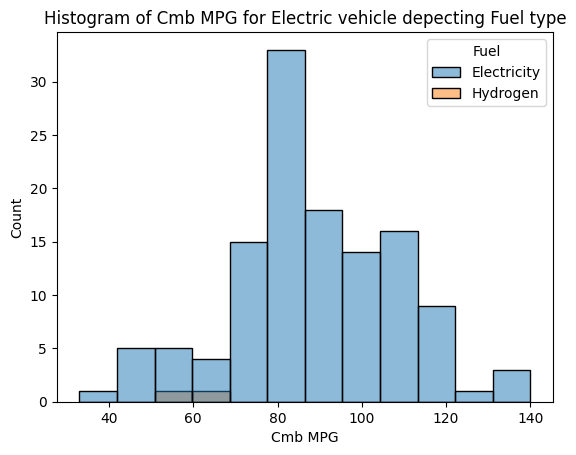

In [29]:
ax = sns.histplot(data=e_df, x="Cmb MPG", hue='Fuel', bins=calculate_bin(e_df['Cmb MPG']), log_scale=(False, False))
ax.set_title("Histogram of Cmb MPG for Electric vehicle depecting Fuel type");

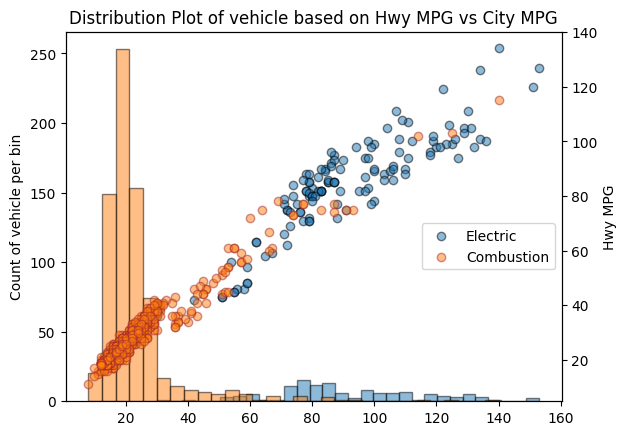

In [30]:
fig, ax2 = plt.subplots()

ax2.hist(x=e_df["City MPG"], bins=30, alpha=0.5, edgecolor='black', zorder=1)
ax2.hist(x=c_df["City MPG"], bins=30, alpha=0.5, edgecolor='black', zorder=2)
ax2.set_ylabel("Histogram of City MPG vs Hwy MPG")
ax2.set_ylabel("Count of vehicle per bin")

ax1 = ax2.twinx()

ax1.scatter(x=e_df["City MPG"], y=e_df["Hwy MPG"], alpha=0.5, edgecolor='black', label='Electric', zorder=2)
ax1.scatter(x=c_df["City MPG"], y=c_df["Hwy MPG"], alpha=0.5, edgecolor='brown', label='Combustion', zorder=2)
ax1.set_ylabel("Hwy MPG")
ax1.set_xlabel("City MPG")
ax1.set_title("Distribution Plot of vehicle based on Hwy MPG vs City MPG")
ax1.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5));

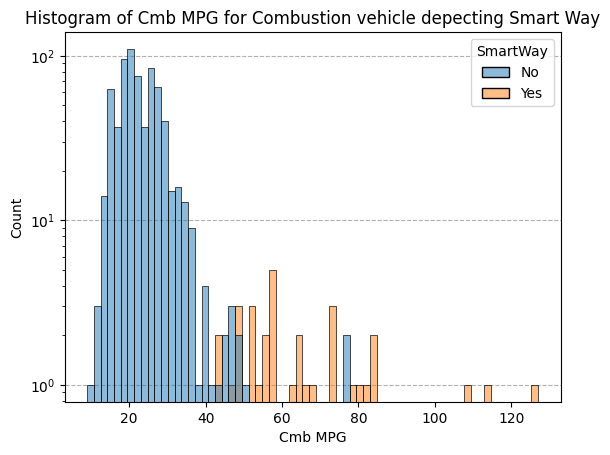

In [31]:
ax = sns.histplot(data=c_df, x="Cmb MPG", hue='SmartWay', bins=calculate_bin(c_df['Cmb MPG']), log_scale=(False, True), )
ax.set_title("Histogram of Cmb MPG for Combustion vehicle depecting Smart Way")
ax.grid(axis='y', linestyle='--')
ax.set_axisbelow(True);

## Hypothesis Test for a Population Proportion – Large Sample

In [32]:
def population_prop(sample1, sample2, alpha=0.05):
    
    # Conduct a two-sample t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print the results
    print("Independent two-sample t-test:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

    # Interpret the results
    if p_value < alpha:
        print("Reject the null hypothesis. There is sufficient evidence to conclude that the population means are different.\n")
    else:
        print("Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the population means are different.\n")

population_prop(e_df['City MPG'], e_df['Hwy MPG'], 0.05)
population_prop(c_df['City MPG'], c_df['Hwy MPG'], 0.05)

Independent two-sample t-test:
t-statistic: 2.6416699515356226
p-value: 0.00876998589546843
Reject the null hypothesis. There is sufficient evidence to conclude that the population means are different.

Independent two-sample t-test:
t-statistic: -9.19169547073889
p-value: 1.298660433112719e-19
Reject the null hypothesis. There is sufficient evidence to conclude that the population means are different.



## Hypothesis Test for a Population Variance – Large Sample

In [33]:
from scipy import stats

def hypothesis_test_two_population_variances(sample1, sample2, alpha=0.05):

    # Calculate variances of the samples
    var1 = np.var(sample1, ddof=1)  # Sample variance of population 1
    var2 = np.var(sample2, ddof=1)  # Sample variance of population 2

    # Perform F-test
    f_statistic = var1 / var2 if var1 >= var2 else var2 / var1
    df1 = len(sample1) - 1
    df2 = len(sample2) - 1
    p_value = stats.f.cdf(f_statistic, df1, df2) if var1 >= var2 else 1 - stats.f.cdf(f_statistic, df2, df1)

    # Interpret the results
    if p_value < alpha:
        result = "Reject the null hypothesis. There is sufficient evidence to conclude that the population variances are different."
    else:
        result = "Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the population variances are different."
        
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    print("Result:", result)

In [34]:
hypothesis_test_two_population_variances(e_df['City MPG'], e_df['Hwy MPG'], 0.05)

F-statistic: 1.664275902011779
p-value: 0.9976490396318496
Result: Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the population variances are different.


In [35]:
hypothesis_test_two_population_variances(c_df['City MPG'], c_df['Hwy MPG'], 0.05)

F-statistic: 1.3821765436607942
p-value: 0.9999931759584052
Result: Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the population variances are different.


## The Mann-Whitney Test

In [36]:
def mann_whitney_test(sample1, sample2, alpha=0.05):

    # Perform Mann-Whitney U test
    u_statistic, p_value = stats.mannwhitneyu(sample1, sample2, alternative='two-sided')

    # Interpret the results
    if p_value < alpha:
        result = "Reject the null hypothesis. There is sufficient evidence to conclude that the distributions are different."
    else:
        result = "Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the distributions are different."

    print("Mann-Whitney U statistic:", u_statistic)
    print("p-value:", p_value)
    print("Result:", result)

In [37]:
mann_whitney_test(e_df['City MPG'], e_df['Hwy MPG'], 0.05)

Mann-Whitney U statistic: 8924.0
p-value: 0.08840834068847528
Result: Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the distributions are different.


## ANOVA Test

In [38]:
def fisher_exact_test(df, column1, column2, alternative='greater'):

    # Create a contingency table from the two columns
    contingency_table = pd.crosstab(df[column1], df[column2])
    print(contingency_table)
    
    # Perform Fisher's exact test
    odds_ratio, p_value = stats.fisher_exact(contingency_table, alternative=alternative)
    
    print("Odds Ratio:", odds_ratio)
    print("p-value:", p_value)

In [39]:
fisher_exact_test(c_df, 'Drive', 'Drive')

Drive  2WD  4WD
Drive          
2WD    288    0
4WD      0  439
Odds Ratio: inf
p-value: 3.3951089975896402e-211


## Chi square test

In [40]:
def chi_square_test(df, column1, column2, alternative='greater'):

    # Create a contingency table from the two columns
    contingency_table = pd.crosstab(df[column1], df[column2])
    print(contingency_table)
    
    # Perform Fisher's exact test
    odds_ratio, p_value = stats.chisquare(contingency_table)
    
    print("Odds Ratio:\n", odds_ratio)
    print("\np-value:\n", p_value)

In [41]:
chi_square_test(c_df, 'Drive', 'Cyl')

Cyl    3.0   4.0   5.0   6.0   8.0   10.0  12.0  16.0
Drive                                                
2WD      12   142     0    92    36     1     5     0
4WD       4   185     1   150    86     2    10     1
Odds Ratio:
 [ 4.          5.65443425  1.         13.90082645 20.49180328  0.33333333
  1.66666667  1.        ]

p-value:
 [4.55002639e-02 1.74112905e-02 3.17310508e-01 1.92713711e-04
 5.98871621e-06 5.63702862e-01 1.96705602e-01 3.17310508e-01]


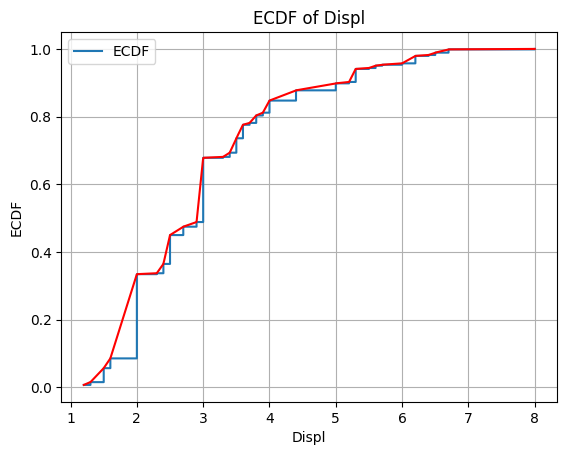

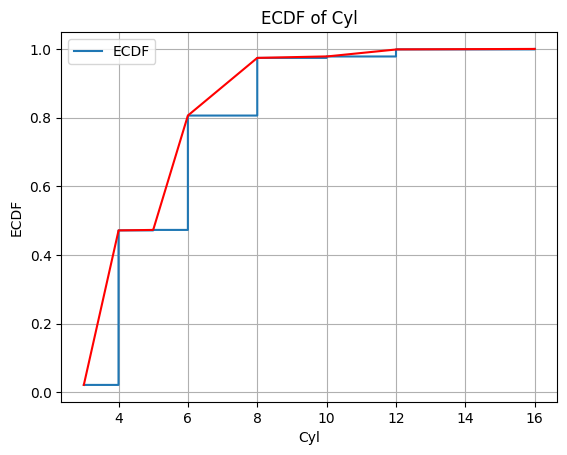

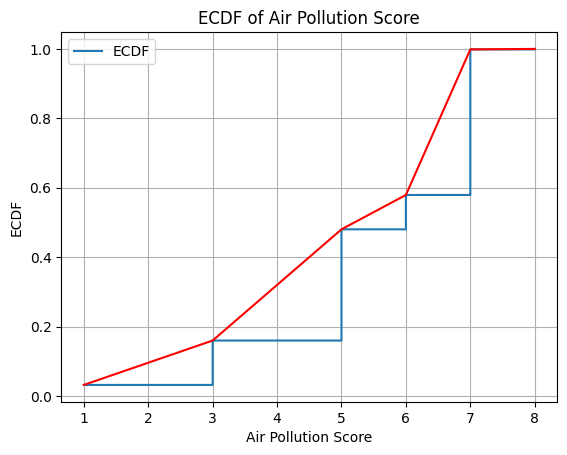

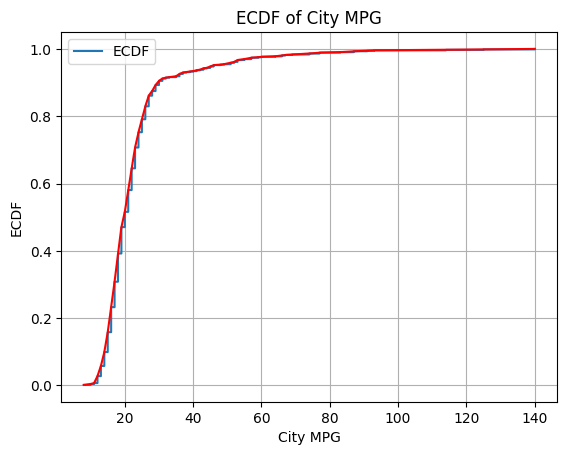

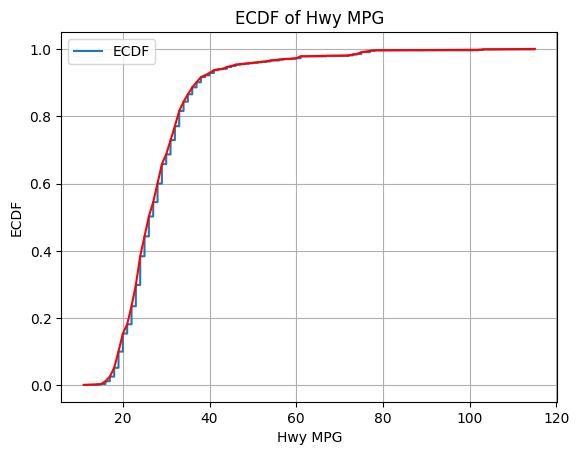

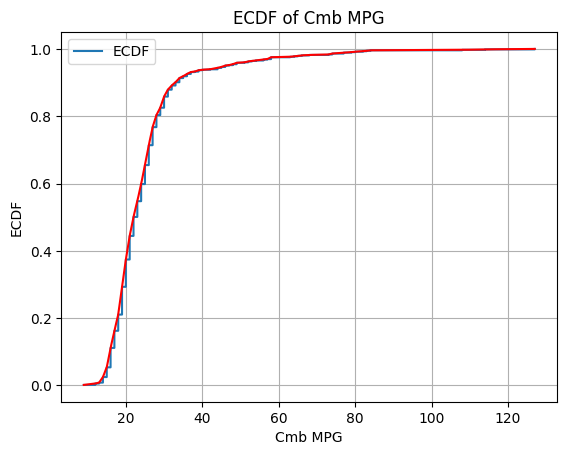

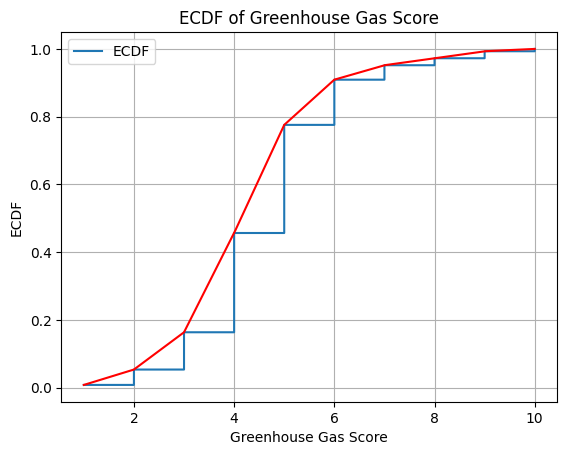

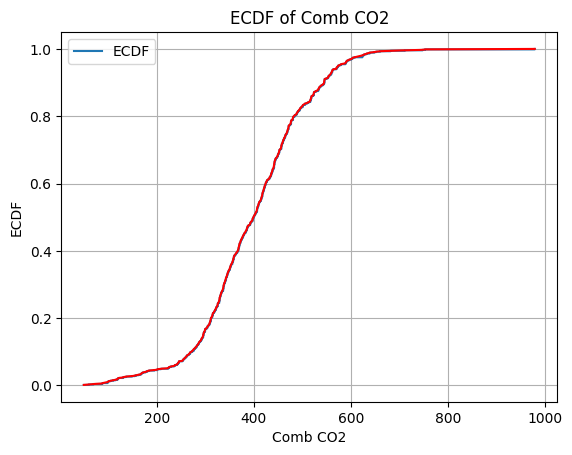

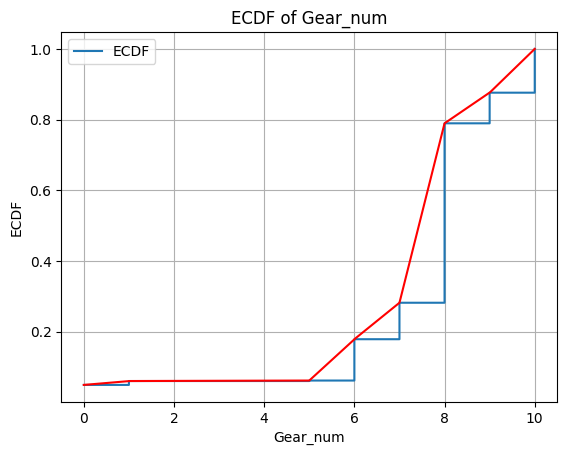

In [42]:
from scipy.interpolate import interp1d
import statsmodels.api as sm

for column in c_df.columns:
    if c_df[column].dtype != 'object':
        # For numeric columns, compute ECDF
        values = c_df[column].values
        ecdf = sm.distributions.ECDF(values)
        x = np.sort(values)
        y = ecdf(x)
        
        # Plot ECDF with lines connecting the points
        plt.step(x, y, where='post', label='ECDF')
        
        # Interpolate to connect all the points of ECDF
        f = interp1d(x, y, kind='linear')
        x_new = np.linspace(x[0], x[-1], 1000)
        y_new = f(x_new)
        plt.plot(x_new, y_new, color='red')
        
        plt.xlabel(column)
        plt.ylabel('ECDF')
        plt.title(f'ECDF of {column}')
        plt.legend()

        plt.grid(True)
        plt.show()


In [43]:
from scipy import stats
import numpy as np

# Sample data for two groups
group1 = c_df['City MPG']
group2 = c_df['Hwy MPG']

# Calculate mean and standard deviation for each group
mean1 = np.mean(group1)
mean2 = np.mean(group2)
std1 = np.std(group1, ddof=1)  # Use ddof=1 for sample standard deviation
std2 = np.std(group2, ddof=1)

# Calculate pooled standard deviation
pooled_std = np.sqrt((std1**2 + std2**2) / 2)

# Calculate z-score
z_score = (mean1 - mean2) / (pooled_std * np.sqrt(2/len(group1)))

# Calculate p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # Two-tailed test

# Set significance level
alpha = 0.05

# Print results
print("Z-score:", z_score)
print("P-value:", p_value)

# Compare p-value to significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-score: -9.19169547073889
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the means.


In [44]:
# import pandas as pd
# from scipy.stats import chi2_contingency

# # Load the dataset
# df = pd.read_excel("/kaggle/input/2024-epa-vehicle-fuel-economy/all_alpha_24.xlsx")


# target_variable = 'Comb CO2'

# # Select categorical features
# categorical_features = ['Model', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd Description', 'Veh Class', 'SmartWay']

# # Create contingency tables and perform Chi-Square test for each pair of categorical variables
# for feature in categorical_features:
#     if feature != target_variable:
#         contingency_table = pd.crosstab(df[feature], df[target_variable])
#         chi2, p, dof, expected = chi2_contingency(contingency_table)
#         print(f"Chi-Square test of association between {feature} and {target_variable}:")
#         print("Chi2 Statistic:", chi2)
#         print("P-value:", p)
#         print("Degrees of Freedom:", dof)
#         print("Expected Frequencies:")
#         print(expected)
#         print("\n")


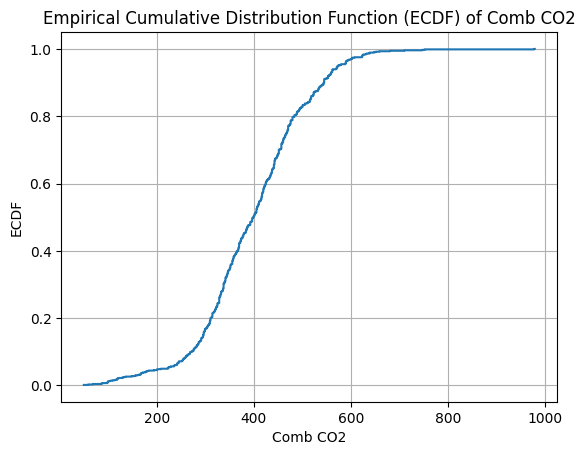

In [45]:
import statsmodels.api as sm

c_df['Comb CO2'] = pd.to_numeric(c_df['Comb CO2'], errors='coerce')

# Drop any NaN values
c_df.dropna(subset=['Comb CO2'], inplace=True)

# Get the numeric values of 'Comb CO2'
comb_co2 = c_df['Comb CO2'].values

# Compute ECDF
ecdf = sm.distributions.ECDF(comb_co2)

# Create a range of values for x-axis
x = np.linspace(min(comb_co2), max(comb_co2), num=len(comb_co2))

# Calculate ECDF values for the x range
y = ecdf(x)

# Plot ECDF
plt.step(x, y)
plt.xlabel('Comb CO2')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Comb CO2')
plt.grid(True)
plt.show()

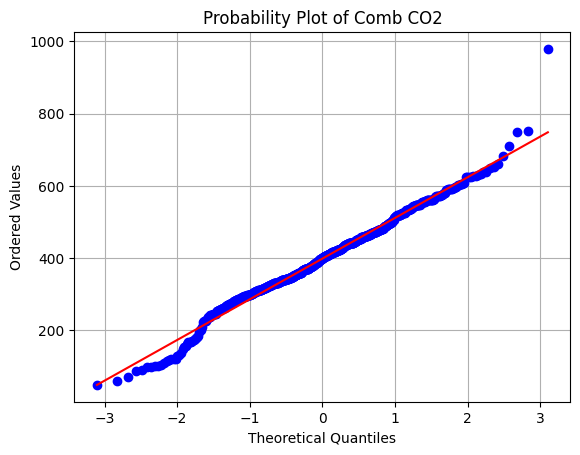

In [46]:
import scipy.stats as stats
# Generate a normal distribution to compare against
normal_distribution = np.random.normal(loc=np.mean(comb_co2), scale=np.std(comb_co2), size=len(comb_co2))

# Create a probability plot
stats.probplot(comb_co2, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Probability Plot of Comb CO2')
plt.grid(True)
plt.show()


In [47]:
# from string import ascii_letters
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set_theme(style="white")

# d = df[['Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'Comb CO2']]

# # Compute the correlation matrix
# corr = d.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
# # loading dataset
# data = df

# # creating an Autoviz instance
# AV = AutoViz_Class()

# # generating data visualization automatically
# AV.AutoViz(
#     filename='', 
#     sep=',', 
#     depVar='', 
#     dfte=data, 
#     header=0, 
#     verbose=0, 
#     lowess=False, 
#     chart_format='svg', 
#     max_rows_analyzed=10000, 
#     max_cols_analyzed=30
# )

In [49]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_excel("/kaggle/input/2024-epa-vehicle-fuel-economy/all_alpha_24.xlsx")


target_variable = 'Comb CO2'

# Select categorical features
categorical_features = ['Model', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd Description', 'Veh Class', 'SmartWay']

# Create contingency tables and perform Chi-Square test for each pair of categorical variables
for feature in categorical_features:
    if feature != target_variable:
        contingency_table = pd.crosstab(df[feature], df[target_variable])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square test of association between {feature} and {target_variable}:")
        print("Chi2 Statistic:", chi2)
        print("P-value:", p)
        print("Degrees of Freedom:", dof)
        print("Expected Frequencies:")
        print(expected)
        print("\n")


Chi-Square test of association between Model and Comb CO2:
Chi2 Statistic: 376593.0365376453
P-value: 0.0
Degrees of Freedom: 195546
Expected Frequencies:
[[0.58844133 0.00467017 0.00467017 ... 0.00467017 0.00467017 0.00934034]
 [0.58844133 0.00467017 0.00467017 ... 0.00467017 0.00467017 0.00934034]
 [0.58844133 0.00467017 0.00467017 ... 0.00467017 0.00467017 0.00934034]
 ...
 [0.29422067 0.00233508 0.00233508 ... 0.00233508 0.00233508 0.00467017]
 [0.29422067 0.00233508 0.00233508 ... 0.00233508 0.00233508 0.00467017]
 [0.29422067 0.00233508 0.00233508 ... 0.00233508 0.00233508 0.00467017]]


Chi-Square test of association between Trans and Comb CO2:
Chi2 Statistic: 24691.11405886861
P-value: 0.0
Degrees of Freedom: 7848
Expected Frequencies:
[[2.94220665e+00 2.33508465e-02 2.33508465e-02 ... 2.33508465e-02
  2.33508465e-02 4.67016929e-02]
 [1.50052539e+01 1.19089317e-01 1.19089317e-01 ... 1.19089317e-01
  1.19089317e-01 2.38178634e-01]
 [8.53239930e+00 6.77174548e-02 6.77174548e-02 .